# K-Nearest Neighbors (KNN) Algorithm

KNN stands for **K-Nearest Neighbors**. It is a **supervised learning algorithm** mostly used for **classification** of data based on how its neighbors are classified. KNN stores all available cases and classifies new cases based on a similarity measure. The **K** in KNN is a parameter that refers to the number of the nearest neighbors to include in the majority voting process.

## How do we choose K?

The value of K is typically chosen as the square root of the total number of data points:

Where `n` is the total number of data points.  
If k is even, you can make K odd by adding or subtracting 1 to ensure better results in the voting process.

If K = 3, then the algorithm will look at the 3 nearest neighbors to a given data point and classify it based on the majority class of those neighbors (in classification).

## When to use KNN?

You can use KNN when:
- The dataset is **labeled**.
- The dataset is **noise-free**.
- The dataset is relatively **small**, as KNN is a "lazy learner" (i.e., it doesn't learn a model in advance, but instead stores the entire dataset and uses it at runtime).

### Math: (Euclidean Distance, Manhattan Distance, Minkowski Distance)
# Distance Metrics

### 1. Euclidean Distance
Euclidean Distance measures the straight-line distance between two points in Euclidean space.

For two points:
- \( \mathbf{x} = (x_1, x_2, ..., x_n) \)
- \( \mathbf{y} = (y_1, y_2, ..., y_n) \)

The formula for Euclidean distance is:

$$
d_{Euclidean}(\mathbf{x}, \mathbf{y}) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$

Where:
- \( x_i \) and \( y_i \) are the coordinates of the points in n-dimensional space.
- The sum of the squared differences between corresponding coordinates is then square-rooted.

### 2. Manhattan Distance
Manhattan Distance, also known as L1 norm or Taxicab Distance, measures the sum of the absolute differences between two points.

For two points:
- \( \mathbf{x} = (x_1, x_2, ..., x_n) \)
- \( \mathbf{y} = (y_1, y_2, ..., y_n) \)

The formula for Manhattan distance is:

$$
d_{Manhattan}(\mathbf{x}, \mathbf{y}) = \sum_{i=1}^{n} |x_i - y_i|
$$

Where:
- \( |x_i - y_i| \) is the absolute difference between the corresponding coordinates of the points.

### 3. Minkowski Distance
Minkowski Distance is a generalization of both Euclidean and Manhattan distances. It is parameterized by a value \( p \), and can be seen as a family of distances.

For two points:
- \( \mathbf{x} = (x_1, x_2, ..., x_n) \)
- \( \mathbf{y} = (y_1, y_2, ..., y_n) \)

The formula for Minkowski distance is:

$$
d_{Minkowski}(\mathbf{x}, \mathbf{y}, p) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}}
$$

Where:
- \( p \) is a parameter that determines the type of distance:
  - For \( p = 1 \), it becomes **Manhattan Distance**.
  - For \( p = 2 \), it becomes **Euclidean Distance**.
  - For other values of \( p \), it is a generalization of both distances.
- The sum of the absolute differences raised to the power \( p \) is then raised to the power of \( \frac{1}{p} \).

---

### Key Notes:
- **Euclidean Distance** is the most commonly used distance metric when you need to find the "straight-line" distance.
- **Manhattan Distance** is useful when dealing with grid-based systems (e.g., city blocks).
- **Minkowski Distance** is a flexible metric, as it can represent both Euclidean and Manhattan distances by adjusting the parameter \( p \).
- **Cosine Similarity** treats the features as elements of a vector. Divides dot product of two vectors by each of their magnitudes. Selects k nearest neighbors whose cos similarity is closest to 1.

## Example walkthrough:

### Training Data

| x1  | x2  | Label |
|-----|-----|-------|
| 2   | 3   | 0     |
| 3   | 3   | 0     |
| 6   | 5   | 1     |
| 7   | 8   | 1     |
| 5   | 6   | 1     |

### Test Data Point

$$ x_{\text{test}} = (5, 4) $$

### Step 1: Compute Distances

We will compute the **Euclidean distance** between the test point and all points in the training set.

The formula for **Euclidean distance** between two points \( \mathbf{x} = (x_1, x_2) \) and \( \mathbf{y} = (y_1, y_2) \) is:

$$
d_{\text{Euclidean}}(\mathbf{x}, \mathbf{y}) = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2}
$$

#### Distances:

1. **Distance to (2, 3):**
$$
d = \sqrt{(5 - 2)^2 + (4 - 3)^2} = \sqrt{9 + 1} = \sqrt{10} \approx 3.162
$$

2. **Distance to (3, 3):**
$$
d = \sqrt{(5 - 3)^2 + (4 - 3)^2} = \sqrt{4 + 1} = \sqrt{5} \approx 2.236
$$

3. **Distance to (6, 5):**
$$
d = \sqrt{(5 - 6)^2 + (4 - 5)^2} = \sqrt{1 + 1} = \sqrt{2} \approx 1.414
$$

4. **Distance to (7, 8):**
$$
d = \sqrt{(5 - 7)^2 + (4 - 8)^2} = \sqrt{4 + 16} = \sqrt{20} \approx 4.472
$$

5. **Distance to (5, 6):**
$$
d = \sqrt{(5 - 5)^2 + (4 - 6)^2} = \sqrt{0 + 4} = \sqrt{4} = 2
$$

### Step 2: Identify Nearest Neighbors

Let's use \( k = 3 \). The 3 closest neighbors are:

| Point   | Distance |
|---------|----------|
| (5, 6)  | 2.0      |
| (3, 3)  | 2.236    |
| (6, 5)  | 1.414    |
| (2, 3)  | 3.162    |
| (7, 8)  | 4.472    |

The 3 closest neighbors are:

- (6, 5) with label 1
- (5, 6) with label 1
- (3, 3) with label 0

### Step 3: Make Prediction (Classification)

Using **majority voting**, we find that 2 out of the 3 nearest neighbors have label 1, and 1 has label 0. Therefore, the predicted label for \( x_{\text{test}} \) is:

**Predicted Label = 1**

---

## KNN for Regression

### Training Data

| x1  | x2  | Target |
|-----|-----|--------|
| 2   | 3   | 10     |
| 3   | 3   | 15     |
| 6   | 5   | 30     |
| 7   | 8   | 40     |
| 5   | 6   | 25     |

### Test Data Point

$$ x_{\text{test}} = (5, 4) $$

### Step 1: Compute Distances

We compute the **Euclidean distance** between \( x_{\text{test}} = (5, 4) \) and each point in the training set (the same as in the classification case):

- Distance to (2, 3) = 3.162
- Distance to (3, 3) = 2.236
- Distance to (6, 5) = 1.414
- Distance to (7, 8) = 4.472
- Distance to (5, 6) = 2.0

### Step 2: Identify Nearest Neighbors

Again, with \( k = 3 \), the 3 closest neighbors are:

- (6, 5) with target 30
- (5, 6) with target 25
- (3, 3) with target 15

### Step 3: Make Prediction (Regression)

For regression, we compute the **weighted average** of the target values of the nearest neighbors, using the inverse of the distance as the weight.

The weighted average formula is:

$$
\hat{y} = \frac{\sum_{i=1}^{k} \frac{y_i}{d(x_{\text{test}}, x_i)}}{\sum_{i=1}^{k} \frac{1}{d(x_{\text{test}}, x_i)}}
$$

Where:
- \( y_i \) are the target values of the neighbors.
- \( d(x_{\text{test}}, x_i) \) are the distances to the neighbors.

#### Compute the Weighted Average:

- Weights for each neighbor:
  - \( w_1 = \frac{1}{1.414} \approx 0.707 \)
  - \( w_2 = \frac{1}{2.0} = 0.5 \)
  - \( w_3 = \frac{1}{2.236} \approx 0.447 \)

- Weighted sum of target values:
  - \( \text{weighted sum} = (30 \times 0.707) + (25 \times 0.5) + (15 \times 0.447) = 21.21 + 12.5 + 6.705 = 40.415 \)

- Sum of weights:
  - \( \text{sum of weights} = 0.707 + 0.5 + 0.447 = 1.654 \)

- Predicted target value:

$$
\hat{y} = \frac{40.415}{1.654} \approx 24.5
$$

**Predicted Target = 24.5**

---

## Summary:

- **KNN for Classification**: Uses majority voting from the nearest neighbors to predict the class label.
- **KNN for Regression**: Uses a weighted average of the target values of the nearest neighbors to predict a continuous value.

In both cases, the choice of \( k \) and the distance metric (like Euclidean or Manhattan distance) play a crucial role in the algorithm's performance.


https://www.cs.cornell.edu/courses/cs4780/2017sp/lectures/lecturenote02_kNN.html

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Standardize ALWAYS DO THIS FOR DISTANCE BASED ALGOS, makes distribution mean 0 and st dev 1
# Standardization ensures that each feature contributes equally to the model.
# e.g. if feature1 = [10,20,30] and feature2 = [.01,.02,.03], feature1 will have more impact
# thus we want feature1 and 2 to have equal impact, thus we standardize the dataset.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
print(X_train_scaled[:5]) # display first 5 rows of standardized training data
X_test_scaled = scaler.transform(X_test)
print(X_test_scaled[:5]) # display first 5 rows of standardized test data

# Initialize the KNN classifier
# a small k can lead to data overfiting, more sensitive to noice
# a large k can reduce noice, but risks underfitting
# its common practice to use odd numbers for k, this avoids ties in binary classification
# (you can use cross validation to determine optimal k, but my brain's exausted, so i didn't)
knn = KNeighborsClassifier(n_neighbors=9)

# Train the model
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


[[-0.54270972  0.01713978  0.34804919  0.29802754]
 [ 0.42641478  1.04552653  0.87957228  1.3752355 ]
 [-0.42156916 -1.78253704  0.05275859  0.02872555]
 [-0.54270972  2.33100998 -1.30557819 -1.18313341]
 [-1.02727197 -1.78253704 -0.36064826 -0.37522744]]
[[ 0.30527422 -0.4970536   0.46616543 -0.10592545]
 [-0.17928803  2.07391329 -1.30557819 -1.31778441]
 [ 2.24352323 -1.01124698  1.76544409  1.3752355 ]
 [ 0.18413366 -0.23995691  0.34804919  0.29802754]
 [ 1.15325816 -0.4970536   0.52522355  0.16337654]]
Accuracy: 98.67%


accuracy hit 98.67% when only 50% of the data was used for training!

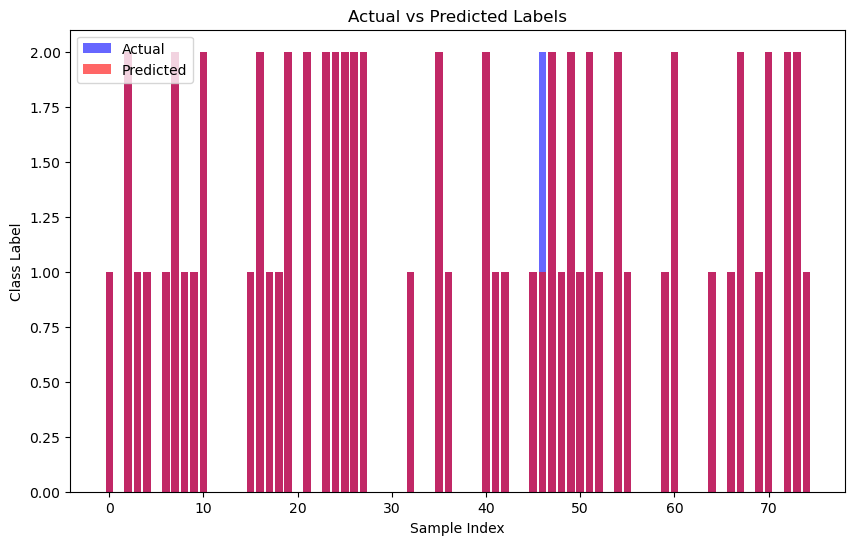

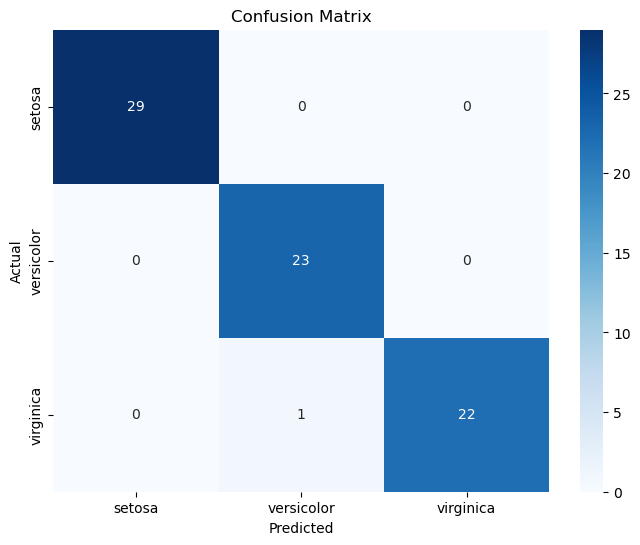

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Actual vs Predicted bar plot
plt.figure(figsize=(10, 6))

# Create a bar plot comparing actual vs predicted labels
plt.bar(range(len(y_test)), y_test, alpha=0.6, label='Actual', color='blue')
plt.bar(range(len(y_pred)), y_pred, alpha=0.6, label='Predicted', color='red')
plt.title("Actual vs Predicted Labels")
plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.legend()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
